In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 16 - Backtest Forecast Models

In [2]:
import pandas as pd
import re

# Raw multiline string with data
data = '''
1700 5.1 1761 86 1622 4.1 1883 63.8 1944 9.7 1701 11.1 1762 61.3 1623 1.9 1884 63.6 1945 33.3
1702 16.1 1763 45.2 1824 8.6 1885 52.3 1946 92.7 1703 23.1 1764 36.5 1825 16.7 1886 25.5 1947 151.7
1704 36.1 1765 21 1826 36.4 1887 13.2 1948 136.4 1705 58.1 1766 11.5 1827 49.7 1888 6.9 1949 134.8
1706 29.1 1767 37.9 1828 64.3 1889 64 1950 84 1707 20.1 1768 69.9 1829 67.1 1890 7.2 1951 69.5
1708 10.1 1769 106.2 1830 71 1891 35.7 1952 31.6 1709 8.1 1770 100.9 1831 47.9 1892 73.1 1953 14
1710 3.1 1771 81.7 1832 27.6 1893 85.2 1954 4.5 1711 0.1 1772 66.6 1833 8.6 1894 78.1 1955 38.1
1712 0.1 1773 34.9 1834 13.3 1895 64.1 1956 141.8 1713 2.1 1774 30.7 1835 57 1896 41.9 1957 190.3
1714 11.1 1775 7.1 1836 121.6 1897 26.3 1958 184.9 1715 27.1 1776 19.9 1837 138.4 1898 26.8 1959 159.1
1716 47.1 1777 92.6 1838 103.3 1899 12.2 1960 112.4 1717 63.1 1778 154.5 1839 85.8 1900 9.6 1961 54
1718 60.1 1779 126 1840 64.7 1901 2.8 1962 37.7 1719 39.1 1780 84.9 1841 36.8 1902 5.1 1963 28
1720 28.1 1781 68.2 1842 24.3 1903 24.5 1964 10.3 1721 26.1 1782 38.6 1843 10.8 1904 42.1 1965 152
1722 22.1 1783 22.9 1844 15.1 1905 63.6 1966 47.1 1723 11.1 1784 10.3 1845 40.2 1906 53.9 1967 93.8
1724 21.1 1785 24.2 1846 61.6 1907 62.1 1968 106 1725 40.1 1786 83 1847 98.6 1908 48.6 1969 105.6
1726 78.1 1787 132.1 1848 124.8 1909 44 1970 104.6 1727 122.1 1788 131 1849 96.4 1910 18.7 1971 66.7
1728 103.1 1789 118.2 1850 66.7 1911 5.8 1972 69 1729 73.1 1790 90 1851 64.6 1912 3.7 1973 38.1
1730 47.1 1791 66.7 1852 54.2 1913 1.5 1974 34.6 1731 35.1 1792 60.1 1853 39.1 1914 9.7 1975 15.6
1732 11.1 1793 47 1854 20.7 1915 47.5 1976 12.7 1733 5.1 1794 41.1 1855 6.8 1916 57.2 1977 27.6
1734 16.1 1795 21.4 1856 4.4 1917 104 1978 92.6 1735 34.1 1796 16.1 1857 22.8 1918 80.7 1979 155.5
1736 70.1 1797 6.5 1858 54.9 1919 63.7 1980 154.7 1737 81.1 1798 4.2 1859 93.9 1920 37.7 1981 140.6
1738 111.1 1799 6.9 1860 95.9 1921 26.2 1982 116 1739 101.1 1800 14.6 1861 77.3 1922 14.3 1983 66.7
1740 73.1 1801 34.1 1862 59.2 1923 59 1984 46 1741 40.1 1802 45.1 1863 44.1 1924 16.8 1985 18
1742 20.1 1803 43.2 1864 47.1 1925 44.4 1986 13.5 1743 16.1 1804 47.6 1865 30.6 1926 64 1987 29.3
1744 5.1 1805 42.3 1866 16.4 1927 69.1 1988 100.3 1745 11.1 1806 28.2 1867 7.4 1928 77.9 1989 157.7
1746 22.1 1807 10.2 1868 37.7 1929 65 1990 142.7 1747 40.1 1808 8.2 1869 74.1 1930 35.8 1991 145.8
1748 60.1 1809 2.6 1870 139.1 1931 21.3 1992 94.4 1749 81 1810 0.1 1871 111.3 1932 11.2 1993 54.7
1750 83.5 1811 1.5 1872 101.7 1933 5.8 1994 30 1751 47.8 1812 5.1 1873 66.3 1934 8.8 1995 17.6
1752 47.9 1813 12.3 1874 44.8 1935 36.2 1996 8.7 1753 30.8 1814 14 1875 17.1 1936 79.8 1997 21.6
1754 12.3 1815 35.5 1876 11.4 1937 114.5 1998 64.4 1755 9.7 1816 45.9 1877 12.5 1938 109.7 1999 93.4
1756 10.3 1817 41.1 1878 3.5 1939 88.9 2000 119.7 1757 32.5 1818 30.2 1879 6.1 1940 67.9 2001 111.1
1758 47.7 1819 24 1880 32.4 1941 47.6 2002 104.1 1759 54.1 1820 15.7 1881 54.4 1942 30.7 2003 63.8
1760 63 1821 6.7 1882 59.8 1943 16.4 2004 40.5
'''

# Extract year-value pairs with regex
pairs = re.findall(r'(\d{4})\s+(\d{1,3}(?:\.\d+)?)', data)

# Convert to DataFrame
df = pd.DataFrame(pairs, columns=['Year', 'Sunspot_Number'])
df['Year'] = df['Year'].astype(int)
df['Sunspot_Number'] = df['Sunspot_Number'].astype(float)

df

,Year,Sunspot_Number
0,1700,5.1
1,1761,86.0
2,1622,4.1
3,1883,63.8
4,1944,9.7
...,...,...
300,1760,63.0
301,1821,6.7
302,1882,59.8
303,1943,16.4


In [3]:
# First, set 'Year' as the index
df = df.set_index('Year')

# Then, convert the index to a PeriodIndex with yearly frequency
df.index = pd.PeriodIndex(df.index, freq='Y')

# Rename the index to 'Date'
df = df.rename_axis('Date')

# Show result
df.head()

,Sunspot_Number
Date,
1700,5.1
1761,86.0
1622,4.1
1883,63.8
1944,9.7


In [4]:
# Sort the index (chronologically)
df = df.sort_index()

# Display the result
df

,Sunspot_Number
Date,
1622,4.1
1623,1.9
1700,5.1
1701,11.1
1702,16.1
...,...
2000,119.7
2001,111.1
2002,104.1


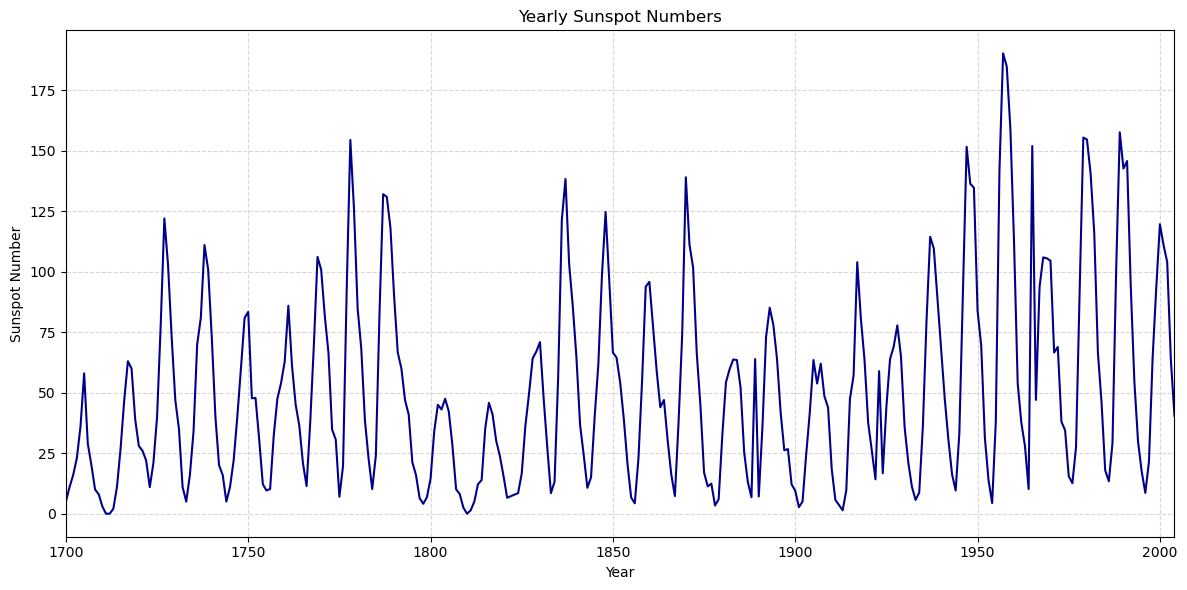

In [5]:
# Extract integer years from PeriodIndex
years = df.index.year
sunspots = df['Sunspot_Number']

# Plot using integer years
plt.figure(figsize=(12, 6))
plt.plot(years, sunspots, color='darkblue')
plt.title('Yearly Sunspot Numbers')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.xlim(1700,2004)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();

In [6]:
X = df['Sunspot_Number'].values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
train_years, test_years = years[:train_size], years[train_size:]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 305
Training Observations: 201
Testing Observations: 104


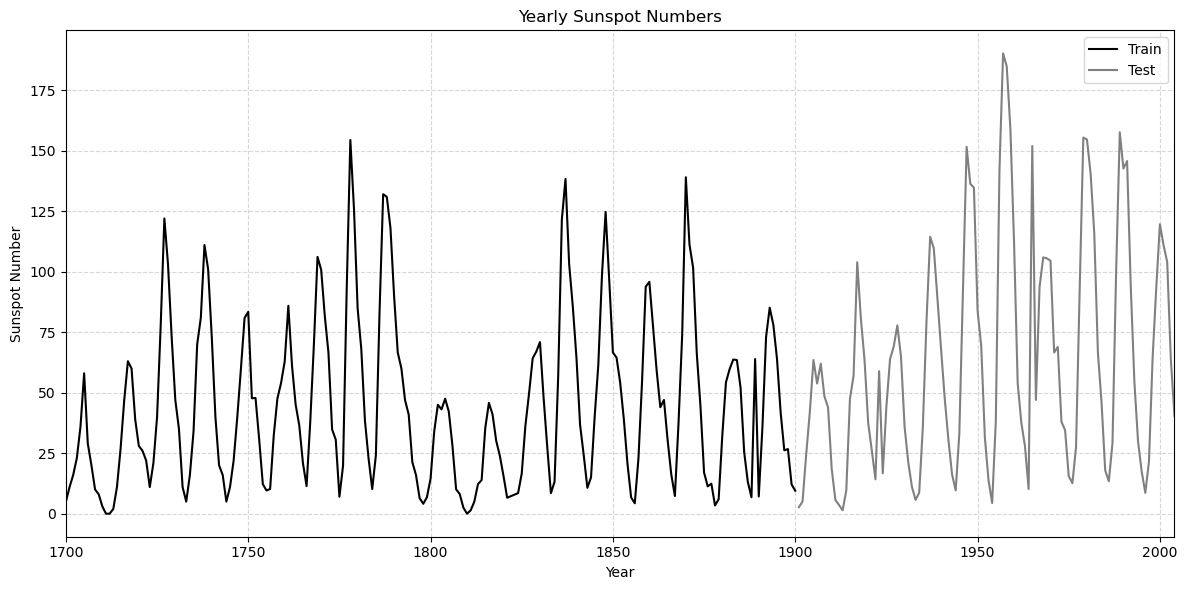

In [7]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_years, train, color='black', label='Train')   # Plot training data
plt.plot(test_years, test, color='gray', label='Test')       # Plot testing data
plt.title('Yearly Sunspot Numbers')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.xlim(1700, 2004)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();

# Chapter 17 - Forecasting Performance Measures

In [8]:
# Calculate forecast error

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]

print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


In [9]:
# Calculate mean forecast error

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)

print('Bias: %f' % bias)

Bias: -0.100000


In [10]:
# Calculate mean absolute error

from sklearn.metrics import mean_absolute_error

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mae = mean_absolute_error(expected, predictions)

print('MAE: %f' % mae)

MAE: 0.140000


In [11]:
# Calculate mean squared error

from sklearn.metrics import mean_squared_error

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mse = mean_squared_error(expected, predictions)

print('MSE: %f' % mse)

MSE: 0.022000


In [12]:
# calculate root mean squared error

from sklearn.metrics import mean_squared_error
from math import sqrt

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)

print('RMSE: %f' % rmse)

RMSE: 0.148324


# Chapter 18 - Persistence Model for Forecasting

In [13]:
from datetime import datetime

# Load the CSV without parsing dates
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url)

# Convert 'Month' column to datetime using custom parser
df['Month'] = pd.to_datetime('190' + df['Month'], format='%Y-%m')

# Set it as the index
df.set_index('Month', inplace=True)

# Show result
df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [14]:
# Create lagged dataset

from pandas import DataFrame, concat                     # Import DataFrame and concat specifically

values = DataFrame(df['Sales'].values)                   # Convert 'Sales' to DataFrame
dataframe = concat([values.shift(1), values], axis=1)    # Add lagged version
dataframe.columns = ['t', 't+1']                         # Rename columns
dataframe.head(5)                                        # Show result

,t,t+1
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


In [15]:
# split into train and test sets

X = dataframe.values
train_size = int(len(X) * 0.66)

train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [16]:
# persistence model

def model_persistence(x):
    return x

In [17]:
# walk-forward validation

predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
rmse = sqrt(mean_squared_error(test_y, predictions))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.156


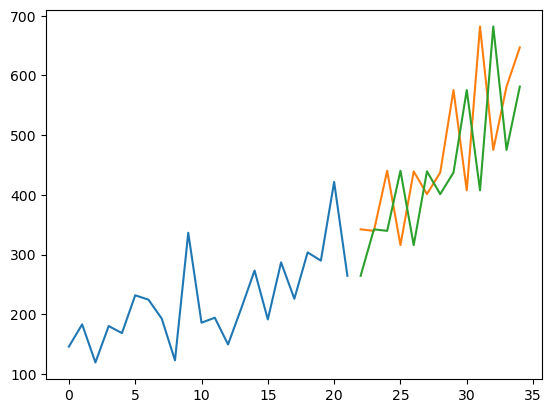

In [18]:
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

# Chapter 19 - Visualize Residual Forecast Errors

In [19]:
url1 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-total-female-births.csv')
df = pd.read_csv(url1, header=0, index_col=0, parse_dates=True)

df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [20]:
# create lagged dataset

values = DataFrame(df['Births'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

In [21]:
# split into train and test sets

X = dataframe.values

train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [22]:
# persistence model

predictions = [x for x in test_X]

In [23]:
# calculate residuals

residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]

residuals = DataFrame(residuals)
residuals.head()

,0
0,9.0
1,-10.0
2,3.0
3,-6.0
4,30.0


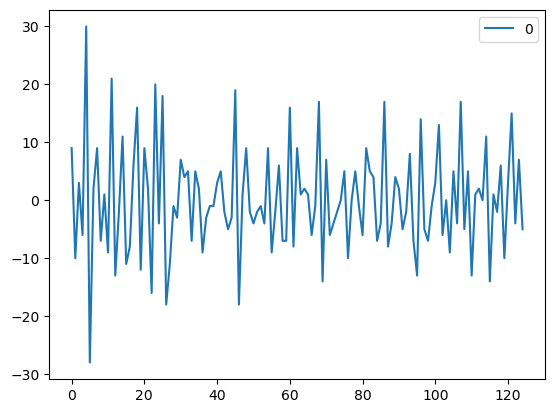

In [24]:
# plot residuals
residuals.plot()
plt.show()

In [25]:
# summary statistics
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


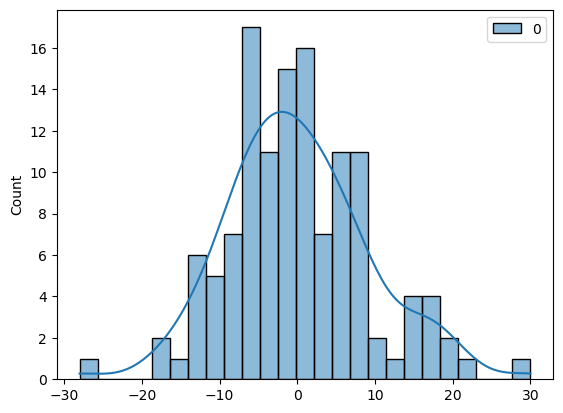

In [26]:
sns.histplot(residuals, bins=25, edgecolor='black', color='darkgreen', kde=True)
plt.show();

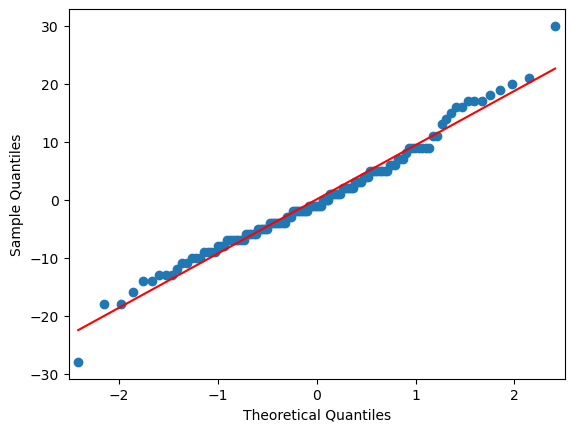

In [27]:
from statsmodels.graphics.gofplots import qqplot

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = np.array(residuals)
qqplot(residuals, line='r')
plt.show()

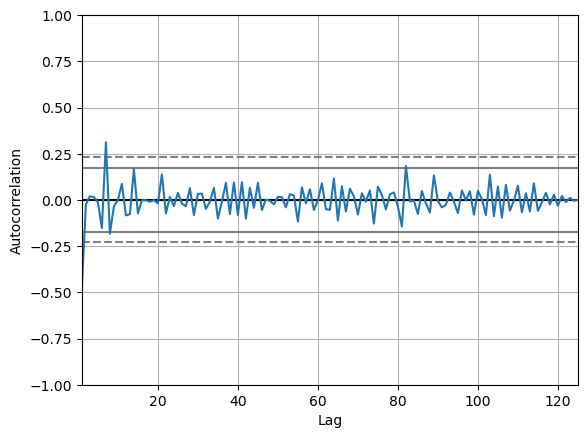

In [28]:
from pandas.plotting import autocorrelation_plot

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
plt.show()

# Chapter 20 - Reframe Time Series Forecasting Problems

In [29]:
url2 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-min-temperatures.csv')
df2 = pd.read_csv(url2, header=0, index_col=0, parse_dates=True)

df2

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [30]:
# create lagged dataset

from pandas import DataFrame, concat

# Create lagged dataset
values = DataFrame(df2['Temp'].values)                              # Convert Temp to DataFrame
dataframe = concat([values.shift(1), values], axis=1)               # Combine with 1-step lag
dataframe.columns = ['t', 't+1']                                    # Rename columns

# Round all values in 't+1' to nearest multiple of 5 (safe vectorized operation)
dataframe['t+1'] = (dataframe['t+1'] / 5).round().astype(int) * 5   # Apply rounding to nearest 5

# Preview first few rows
dataframe.head()

,t,t+1
0,NaN,20
1,20.7,20
2,17.9,20
3,18.8,15
4,14.6,15


In [31]:
from pandas import DataFrame, concat

# Create lagged dataset from 'Temp' column
values = DataFrame(df2['Temp'].values)                        # Convert 'Temp' column to DataFrame
dataframe = concat([values.shift(1), values], axis=1)         # Create lag features (t, t+1)
dataframe.columns = ['t', 't+1']                              # Name the columns

# Drop rows with NaN values created by shift
dataframe.dropna(inplace=True)                                # Drop NaNs after shifting


def discretize_column(df, column='t+1'):

    conditions = [
        df[column] < 10.0,
        df[column] >= 25.0
    ]
    choices = [0, 2]
    df[column] = np.select(conditions, choices, default=1)    # Apply rules
    return df

dataframe = discretize_column(dataframe, column='t+1')

# Display first 5 rows
dataframe.head()

,t,t+1
1,20.7,1
2,17.9,1
3,18.8,1
4,14.6,1
5,15.8,1


In [32]:
# create lagged dataset

values = DataFrame(df2['Temp'].values)    # Convert the 'Temp' column to a DataFrame of values

dataframe = concat([                      # Concatenate shifted versions of the data
    values.shift(1),                      # Lag of 1 (previous time step)
    values,                               # Current time step (t+1)
    values.shift(-1),                     # Lead of 1 (t+2)
    values.shift(-2),                     # Lead of 2 (t+3)
    values.shift(-3),                     # Lead of 3 (t+4)
    values.shift(-4),                     # Lead of 4 (t+5)
    values.shift(-5),                     # Lead of 5 (t+6)
    values.shift(-6)                      # Lead of 6 (t+7)
], axis=1)

dataframe.columns = ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7']  # Set column names for each lag/lead
dataframe.head(14)                                                          # Display the first 14 rows

,t,t+1,t+2,t+3,t+4,t+5,t+6,t+7
0,NaN,20.7,17.9,18.8,14.6,15.8,15.8,15.8
1,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4
2,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8
3,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0
4,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2
5,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3
6,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7
7,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5
8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0
9,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7
